<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n120.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,63.376931,96.836391,85.653999,58.467444,0.564159,314.898923,314.578725,0.320198
1,0.0,1.0,35.489850,21.402241,44.351415,36.581070,-0.233962,147.590615,147.739079,-0.148464
2,0.0,2.0,23.711305,35.366176,56.060193,67.408355,-0.159961,192.386067,192.420829,-0.034762
3,0.0,3.0,84.874868,69.964673,48.435887,98.873349,-0.093887,312.054890,312.324116,-0.269226
4,0.0,4.0,52.670606,66.076694,54.369242,98.853387,-0.185380,281.784548,281.992924,-0.208376
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.952559,93.955252,47.534774,80.912283,0.110126,288.464994,288.165242,0.299752
119996,999.0,116.0,45.199357,91.974355,42.463040,57.115510,-0.718010,246.034252,246.438384,-0.404132
119997,999.0,117.0,69.679245,94.963488,32.184268,72.663296,0.319906,279.810204,279.225163,0.585041
119998,999.0,118.0,29.763750,64.983659,70.743891,28.265826,0.858664,204.615791,203.499020,1.116770


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    63.376931  96.836391  85.653999  58.467444  0.564159  314.898923   
      1.0    35.489850  21.402241  44.351415  36.581070 -0.233962  147.590615   
      2.0    23.711305  35.366176  56.060193  67.408355 -0.159961  192.386067   
      3.0    84.874868  69.964673  48.435887  98.873349 -0.093887  312.054890   
      4.0    52.670606  66.076694  54.369242  98.853387 -0.185380  281.784548   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  55.952559  93.955252  47.534774  80.912283  0.110126  288.464994   
      116.0  45.199357  91.974355  42.463040  57.115510 -0.718010  246.034252   
      117.0  69.679245  94.963488  32.184268  72.663296  0.319906  279.810204   
      118.0  29.763750  64.983659  70.743891  28.265826  0.858664  204.615791   
      119.0  65.982388  90.205420  70.779298  44.475335 -0.927019  280.515422   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    314.578725  0.320198  
      1.0    147.739079 -0.148464  
      2.0    192.420829 -0.034762  
      3.0    312.324116 -0.269226  
      4.0    281.992924 -0.208376  
...                 ...       ...  
999.0 115.0  288.165242  0.299752  
      116.0  246.438384 -0.404132  
      117.0  279.225163  0.585041  
      118.0  203.499020  1.116770  
      119.0  281.245193 -0.729771  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    63.376931  96.836391  85.653999  58.467444  0.564159  314.898923   
      1.0    35.489850  21.402241  44.351415  36.581070 -0.233962  147.590615   
      2.0    23.711305  35.366176  56.060193  67.408355 -0.159961  192.386067   
      3.0    84.874868  69.964673  48.435887  98.873349 -0.093887  312.054890   
      4.0    52.670606  66.076694  54.369242  98.853387 -0.185380  281.784548   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  55.952559  93.955252  47.534774  80.912283  0.110126  288.464994   
      116.0  45.199357  91.974355  42.463040  57.115510 -0.718010  246.034252   
      117.0  69.679245  94.963488  32.184268  72.663296  0.319906  279.810204   
      118.0  29.763750  64.983659  70.743891  28.265826  0.858664  204.615791   
      119.0  65.982388  90.205420  70.779298  44.475335 -0.927019  280.515422   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    314.578725  0.320198  
      1.0    147.739079 -0.148464  
      2.0    192.420829 -0.034762  
      3.0    312.324116 -0.269226  
      4.0    281.992924 -0.208376  
...                 ...       ...  
999.0 115.0  288.165242  0.299752  
      116.0  246.438384 -0.404132  
      117.0  279.225163  0.585041  
      118.0  203.499020  1.116770  
      119.0  281.245193 -0.729771  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,63.376931,96.836391,85.653999,58.467444,0.564159,314.898923,314.578725,0.320198
1,0.0,1.0,35.489850,21.402241,44.351415,36.581070,-0.233962,147.590615,147.739079,-0.148464
2,0.0,2.0,23.711305,35.366176,56.060193,67.408355,-0.159961,192.386067,192.420829,-0.034762
3,0.0,3.0,84.874868,69.964673,48.435887,98.873349,-0.093887,312.054890,312.324116,-0.269226
4,0.0,4.0,52.670606,66.076694,54.369242,98.853387,-0.185380,281.784548,281.992924,-0.208376
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.952559,93.955252,47.534774,80.912283,0.110126,288.464994,288.165242,0.299752
119996,999.0,116.0,45.199357,91.974355,42.463040,57.115510,-0.718010,246.034252,246.438384,-0.404132
119997,999.0,117.0,69.679245,94.963488,32.184268,72.663296,0.319906,279.810204,279.225163,0.585041
119998,999.0,118.0,29.763750,64.983659,70.743891,28.265826,0.858664,204.615791,203.499020,1.116770


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    63.376931  96.836391  85.653999  58.467444  0.564159  314.898923   
      1.0    35.489850  21.402241  44.351415  36.581070 -0.233962  147.590615   
      2.0    23.711305  35.366176  56.060193  67.408355 -0.159961  192.386067   
      3.0    84.874868  69.964673  48.435887  98.873349 -0.093887  312.054890   
      4.0    52.670606  66.076694  54.369242  98.853387 -0.185380  281.784548   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  55.952559  93.955252  47.534774  80.912283  0.110126  288.464994   
      116.0  45.199357  91.974355  42.463040  57.115510 -0.718010  246.034252   
      117.0  69.679245  94.963488  32.184268  72.663296  0.319906  279.810204   
      118.0  29.763750  64.983659  70.743891  28.265826  0.858664  204.615791   
      119.0  65.982388  90.205420  70.779298  44.475335 -0.927019  280.515422   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    314.578725  0.320198  
      1.0    147.739079 -0.148464  
      2.0    192.420829 -0.034762  
      3.0    312.324116 -0.269226  
      4.0    281.992924 -0.208376  
...                 ...       ...  
999.0 115.0  288.165242  0.299752  
      116.0  246.438384 -0.404132  
      117.0  279.225163  0.585041  
      118.0  203.499020  1.116770  
      119.0  281.245193 -0.729771  

[120000 rows x 8 columns]

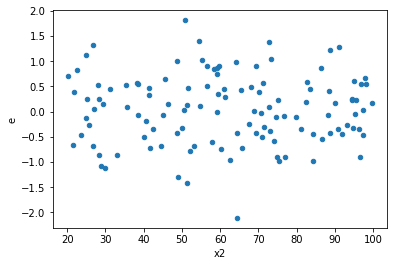

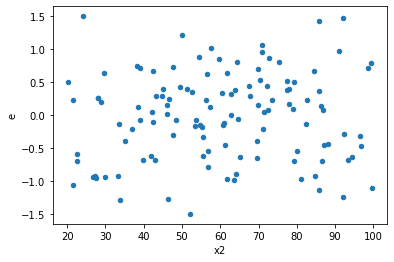

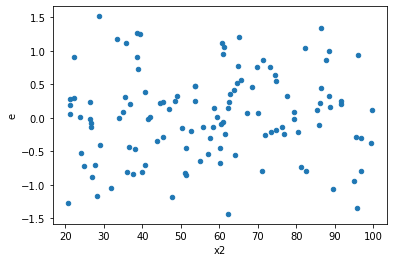

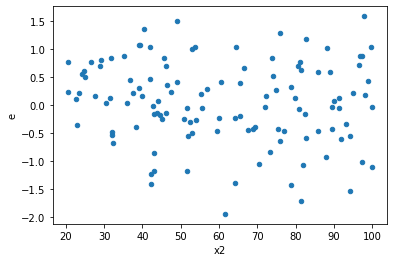

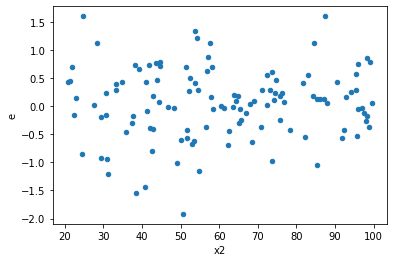

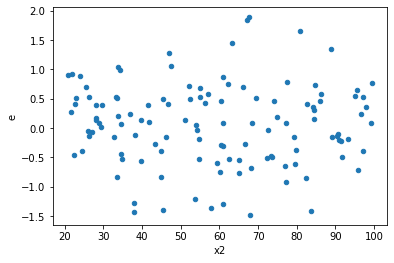

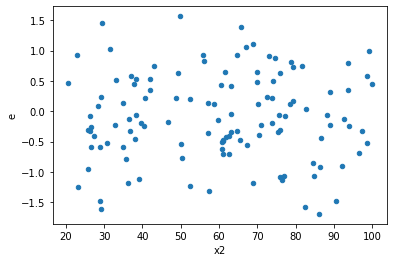

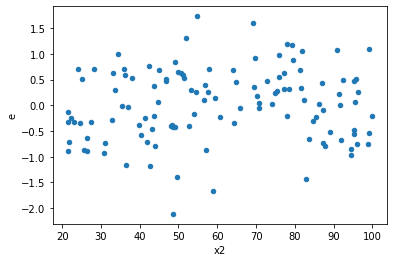

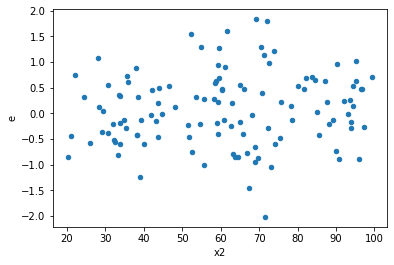

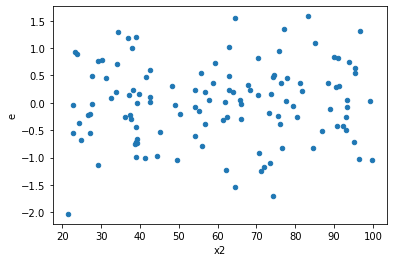

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,57.0,55.0,23.04185600758626,30.463783280576273,0.40424308785239055,0.5538869687377505,1.3701829057371597,0.24284918463146554,0.8785754076842672,0.12142459231573277,Reject005=1 : Homoscedasticity
5.0,58.0,54.0,20.22392783371767,26.01112880544617,0.34868841092616676,0.48168757047122535,1.3814269570697622,0.23217565331105394,0.883912173344473,0.11608782665552697,Reject005=1 : Homoscedasticity
8.0,46.0,66.0,14.709302219136934,36.483891874606,0.3197674395464551,0.5527862405243333,1.7287133465132738,0.041070693133978375,0.9794646534330108,0.020535346566989188,Reject005=0 : Heteroscedasticity
9.0,42.0,70.0,9.938476462826433,45.10209549366159,0.23663039197205793,0.6443156499094512,2.7228778372033213,0.00020388543496463463,0.9998980572825177,0.00010194271748231731,Reject005=0 : Heteroscedasticity
14.0,49.0,63.0,11.478240467190872,32.386668594796774,0.23424980545287494,0.5140741046793139,2.194555097646527,0.003427327404841307,0.9982863362975793,0.0017136637024206536,Reject005=0 : Heteroscedasticity
15.0,60.0,52.0,27.954909772314807,25.53026350144356,0.4659151628719134,0.49096660579699153,1.0537682499334435,0.8508307020934176,0.5745846489532912,0.4254153510467088,Reject005=1 : Homoscedasticity
16.0,57.0,55.0,26.075436024047786,28.154997535193417,0.4574637898955752,0.5119090460944258,1.1190154442852815,0.6767071533143474,0.6616464233428263,0.3383535766571737,Reject005=1 : Homoscedasticity
17.0,67.0,45.0,29.06383494019193,21.153642065705043,0.4337885811968945,0.47008093479344537,1.083663690492761,0.7835162782545975,0.6082418608727013,0.39175813912729873,Reject005=1 : Homoscedasticity
20.0,44.0,68.0,24.79929813687967,44.774147373075415,0.5636204122018107,0.6584433437216973,1.1682389946621277,0.5564029723345634,0.7217985138327183,0.2782014861672817,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,57.0,55.0,23.04185600758626,30.463783280576273,0.40424308785239055,0.5538869687377505,1.3701829057371597,0.24284918463146554,Reject005=1 : Homoscedasticity
1.0,55.0,57.0,27.520699826957213,28.006057216452987,0.5003763604901311,0.49133433713075414,0.9819295552841063,0.9471249864669175,Reject005=1 : Homoscedasticity
2.0,57.0,55.0,36.681458770876304,24.135327049700123,0.6435343644013387,0.4388241281763659,0.6818969622307446,0.15419014510670231,Reject005=1 : Homoscedasticity
3.0,58.0,54.0,34.185102569326375,31.642292134362098,0.5893983201607995,0.5859683728585574,0.9941805953886901,0.9801192321001139,Reject005=1 : Homoscedasticity
4.0,61.0,51.0,34.505771964500255,26.140485174081487,0.56566839286066,0.5125585328251272,0.9061113176804008,0.7082138571156861,Reject005=1 : Homoscedasticity
5.0,58.0,54.0,20.22392783371767,26.01112880544617,0.34868841092616676,0.48168757047122535,1.3814269570697622,0.23217565331105394,Reject005=1 : Homoscedasticity
6.0,67.0,45.0,34.614999801352546,20.425287919163154,0.5166417880798887,0.45389528709251453,0.8785493112731493,0.6222712661710923,Reject005=1 : Homoscedasticity
7.0,52.0,60.0,28.299435274819427,28.240953422734332,0.5442199091311428,0.4706825570455722,0.8648756672592622,0.59485716191053,Reject005=1 : Homoscedasticity
8.0,46.0,66.0,14.709302219136934,36.483891874606,0.3197674395464551,0.5527862405243333,1.7287133465132738,0.041070693133978375,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      944
Reject005=0 : Heteroscedasticity     56
Name: Result_test, dtype: int64